## import

In [16]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn import linear_model
import pandas as pd
from matplotlib import pyplot as plt

df2019 = pd.read_excel('2019.xlsx', index_col=None, skiprows = range(0,2))
df2020 = pd.read_excel('2020.xlsx', index_col=None, skiprows = range(0,2))

## Submitted Ads

In [17]:
df19 = df2019.groupby(['회차']).count()
df20 = df2020.groupby(['회차']).count()
df=pd.concat([df19['접수번호'],df20['접수번호']])
df = df.to_frame().reset_index()
df = df.rename(columns= {'접수번호': '수'})
original_df = pd.DataFrame()
original_df = df.copy()
## Remove outliers
min_thr, max_thr = df['수'].quantile([0.025, 0.975])
df = df.loc[ (df['수'] < max_thr) & (df['수'] > min_thr) ]
##

count = df['수'].count()
df['XX'] = [i+1 for i in range(count)]
df = df.drop(['회차'],axis='columns')
df

,수,XX
0,207,1
1,159,2
3,220,3
4,204,4
5,160,5
...,...,...
66,513,63
67,479,64
68,593,65
69,560,66


## Plot Submitted Ads

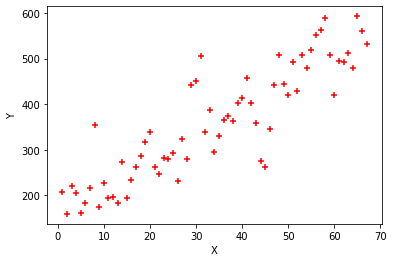

In [18]:
Xx = df.XX
Yy = df.수

%matplotlib inline
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(df.XX,df.수,color='red',marker='+')




## Linear model

In [19]:
X = df.drop('수',axis='columns')
y = df.수

lin = linear_model.LinearRegression()

lin.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

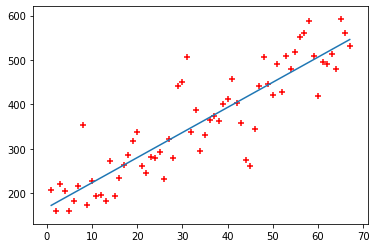

In [20]:
coef = lin.coef_
intercept = lin.intercept_

plt.plot(X, X*coef+intercept, '-', label='fit')
plt.scatter(df.XX,df.수,color='red',marker='+')

## EMA

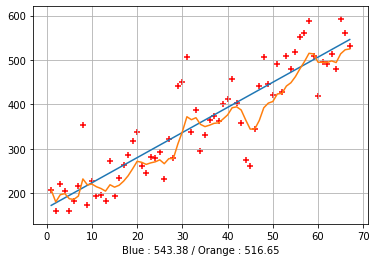

In [21]:
df2 = pd.DataFrame()
df2['ema4'] = df['수'].ewm(4).mean()
df2['XX'] = df['XX']
df2
plt.xlabel('Blue : 543.38 / Orange : 516.65')
plt.plot(X, X*coef+intercept, '-', label='fit')
plt.scatter(df.XX,df.수,color='red',marker='+')
plt.plot(df2.XX,df2.ema4)
plt.grid()

## EMA linear

In [22]:
X2 = df2.drop('ema4',axis='columns')
y2 = df2.ema4
lin2 = linear_model.LinearRegression()
lin2.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(lin.predict([[69]]))
print(lin2.predict([[69]]))

[557.52957139]
[529.01340085]


## Monday to Thursday

In [24]:
df2019['weekday'] = df2019['제출일시'].dt.weekday
df2020['weekday'] = df2020['제출일시'].dt.weekday

l_m_t = []
l_m_t2 = []


nlist = [n for n, df in df2019.groupby(['회차'])]

for n in nlist:
    mon = df2019.loc[(df2019['weekday'] == 0) & (df2019['회차'] == n) ]
    tue = df2019.loc[(df2019['weekday'] == 1) & (df2019['회차'] == n) ]
    wed = df2019.loc[(df2019['weekday'] == 2) & (df2019['회차'] == n) ]
    thu = df2019.loc[(df2019['weekday'] == 3) & (df2019['회차'] == n) ]
    m_t= len(mon) + len(tue) + len(wed) + len(thu)
    l_m_t.append(m_t)
    
    
mlist = [m for m, df in df2020.groupby(['회차'])]

for m in mlist:
    mon2 = df2020.loc[(df2020['weekday'] == 0) & (df2020['회차'] == m) ]
    tue2 = df2020.loc[(df2020['weekday'] == 1) & (df2020['회차'] == m) ]
    wed2 = df2020.loc[(df2020['weekday'] == 2) & (df2020['회차'] == m) ]
    thu2 = df2020.loc[(df2020['weekday'] == 3) & (df2020['회차'] == m) ]
    m_t2 = len(mon2) + len(tue2) + len(wed2) + len(thu2)
    l_m_t2.append(m_t2)
    
lst = l_m_t + l_m_t2
# print(lst)

In [25]:
count2 = original_df['수'].count()
original_df['XX'] = [i+1 for i in range(count2)]
# original_df

In [26]:
df3 = pd.DataFrame()

df3['M_T'] = lst
df3['XX'] = original_df['XX']
df3['Y'] = original_df['수']
df3

XXX = df3.drop('Y',axis='columns')
YYY = df3.Y

In [27]:
lin3 = linear_model.LinearRegression()
lin3.fit(XXX,YYY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
df3

,M_T,XX,Y
0,49,1,207
1,59,2,159
2,48,3,127
3,56,4,220
4,56,5,204
...,...,...,...
66,124,67,513
67,117,68,479
68,152,69,593
69,150,70,560


In [29]:

df3

,M_T,XX,Y
0,49,1,207
1,59,2,159
2,48,3,127
3,56,4,220
4,56,5,204
...,...,...,...
66,124,67,513
67,117,68,479
68,152,69,593
69,150,70,560


In [48]:
lin3.predict([[119,71]])

array([541.33936012])

In [40]:
aa = 0

for a in range(45,90):
    aa = aa+lin.predict([[a]])

    
print(aa)
    
bb = 0

for b in range(90,135):
    bb = bb+lin.predict([[b]])

    
print(bb)

print()

[24579.32396839]
[36043.22571634]



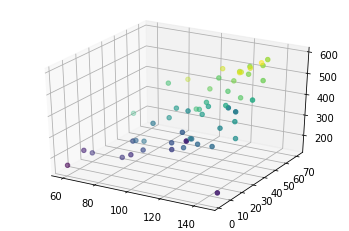

In [62]:
df4 = df3.copy()
min_thr4, max_thr4 = df4.M_T.quantile([0.11, 0.89])
df4 = df4.loc[ (df4.M_T < max_thr4) & (df4.M_T > min_thr4) ]
df4.reset_index(inplace=True)

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
zline = df4.Y
xline = df4.M_T
yline = df4.XX
ax.scatter3D(xline, yline, zline, c=yline)


In [63]:
df4
df4.drop(columns='index', inplace=True)
df4['Z'] = df4.index+1
df4.drop('XX', axis = 'columns', inplace = True)


In [64]:
df4

,M_T,Y,Z
0,59,159,1
1,146,147,2
2,64,216,3
3,126,354,4
4,91,227,5
5,66,193,6
6,84,196,7
7,113,273,8
8,94,234,9
9,87,263,10


In [65]:
lin4 = linear_model.LinearRegression()
lin4.fit(df4.drop(columns = 'Y'),df4.Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
# M_T / Z

In [120]:
lin4.predict([[119,55]])

array([535.59123981])

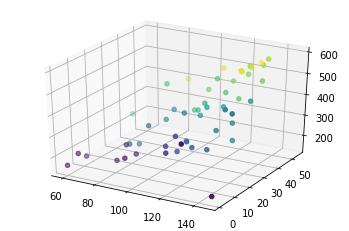

In [104]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zline = df4.Y
xline = df4.M_T
yline = df4.Z
ax.scatter3D(xline, yline, zline, c=yline)

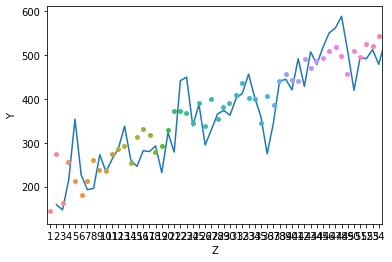

In [134]:
sns.lineplot(df4.Z, df4.Y)
sns.stripplot(df4.Z, lin4.predict(df4.drop(columns = 'Y')))

In [126]:
lin4.predict(df4.drop(columns = 'Y'))

array([143.2802113 , 274.4307074 , 161.81689484, 256.90758196,
       212.08621027, 181.68876217, 213.3141855 , 260.80592478,
       239.06283083, 234.62844518, 273.46583031, 286.34015297,
       292.00251384, 254.39310394, 313.4239821 , 330.62548184,
       317.53674204, 279.92733214, 292.80165481, 330.19664757,
       373.36120978, 371.81160885, 368.81961557, 345.63412926,
       391.68347618, 338.20775033, 400.1234132 , 353.85964915,
       381.1578954 , 391.14743335, 409.79132545, 437.0895717 ,
       402.36494652, 400.8153456 , 345.89722739, 406.3704979 ,
       386.06979631, 442.21588974, 457.97499713, 443.44386497,
       440.45187169, 490.82839568, 470.52769409, 487.72919383,
       493.3915547 , 509.15066209, 517.69780768, 498.83949844,
       456.90291147, 508.72182782, 497.07548038, 525.816119  ,
       521.38173336, 542.91041017])

In [37]:
xx = [[1],[2],[3]]
lst7 = [[717400], [1337890], [2250000]]
lin5 = linear_model.LinearRegression()
lin5.fit(xx, lst7)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
lin5.predict([[4]])

array([[2967696.66666667]])

('32bit', 'WindowsPE')
